In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.00644356037006,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005096539991454,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.00500749392627,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Аладдин], \n, [(1992)]...",8.004986007371864,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


In [2]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [3]:
data.crew[1]


'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [11]:
A = set()
for i in data.crew:
    s = (i).split(',')
    print(s)
    for j in s:
        A.add(j)
print(len(A))

['Frank Darabont', ' Tim Robbins', ' Morgan Freeman']
['Francis Ford Coppola', ' Marlon Brando', ' Al Pacino']
['Christopher Nolan', ' Christian Bale', ' Heath Ledger']
['Francis Ford Coppola', ' Al Pacino', ' Robert De Niro']
['Sidney Lumet', ' Henry Fonda', ' Lee J. Cobb']
['Steven Spielberg', ' Liam Neeson', ' Ralph Fiennes']
['Peter Jackson', ' Elijah Wood', ' Viggo Mortensen']
['Quentin Tarantino', ' John Travolta', ' Uma Thurman']
['Peter Jackson', ' Elijah Wood', ' Ian McKellen']
['Sergio Leone', ' Clint Eastwood', ' Eli Wallach']
['Robert Zemeckis', ' Tom Hanks', ' Robin Wright']
['David Fincher', ' Brad Pitt', ' Edward Norton']
['Peter Jackson', ' Elijah Wood', ' Ian McKellen']
['Christopher Nolan', ' Leonardo DiCaprio', ' Joseph Gordon-Levitt']
['Irvin Kershner', ' Mark Hamill', ' Harrison Ford']
['Lana Wachowski', ' Keanu Reeves', ' Laurence Fishburne']
['Martin Scorsese', ' Robert De Niro', ' Ray Liotta']
['Milos Forman', ' Jack Nicholson', ' Louise Fletcher']
['David Finch

In [17]:
B = set()
for i in data.crew:
    s = i.split(',')
    for j in s:
        if '(dir.)' in j:
            B.add(j)
A1 = {}
for i in B:
    k = 0
    for j in data.crew:
        if i in j:
            k+=1
    A1[i] = str(k)
max_val = max(A1.values())
final_dict = {k:v for k, v in A1.items() if v == max_val}
print(final_dict)

{'Steven Spielberg (dir.)': '7', 'Stanley Kubrick (dir.)': '7', 'Martin Scorsese (dir.)': '7', 'Christopher Nolan (dir.)': '7', 'Akira Kurosawa (dir.)': '7'}


In [18]:
B = set()
for i in data.crew:
    s = i.split(',')
    for j in s:
        if '(dir.)' not in j:
            B.add(j)
A1 = {}
for i in B:
    k = 0
    for j in data.crew:
        if i in j:
            k+=1
    A1[i] = str(k)
max_val = max(A1.values())
final_dict = {k:v for k, v in A1.items() if v == max_val}
print(final_dict)

{' Robert De Niro': '9'}


In [23]:
B = set()
for i in data.year:
    B.add(int(i))
B = sorted(B)
A = []
for i in B:
    for j in range(len(data.year)):
        if str(i) == data.year[j]:
            A.append(data.title[j] + " " + str(data.year[j]))
print(A)

['Малыш 1921', 'Шерлок младший 1924', 'The Gold Rush 1925', 'Паровоз Генерал 1926', 'Метрополис 1927', "Страсти Жанны д'Арк 1928", 'Огни большого города 1931', 'М убийца 1931', 'Это случилось однажды ночью 1934', 'Новые времена 1936', 'Унесённые ветром 1939', 'Мистер Смит едет в Вашингтон 1939', 'Волшебник страны Оз 1939', 'Великий диктатор 1940', 'Гроздья гнева 1940', 'Ребекка 1940', 'Гражданин Кейн 1941', 'Casablanca 1942', 'To Be or Not to Be 1942', 'Двойная страховка 1944', 'Эта замечательная жизнь 1946', 'Лучшие годы нашей жизни 1946', 'Похитители велосипедов 1948', 'The Treasure of the Sierra Madre 1948', 'Третий человек 1949', 'Sunset Blvd. 1950', 'All About Eve 1950', 'Расёмон 1950', 'Поющие под дождём 1952', 'Ikiru 1952', 'Плата за страх 1953', 'Токийская повесть 1953', 'Семь самураев 1954', 'Окно во двор 1954', 'В случае убийства набирайте «М» 1954', 'В порту 1954', 'Pather Panchali 1955', '12 рaзгневанных мужчин 1957', 'Тропы славы 1957', 'Свидетель обвинения 1957', 'Мост че

{'Побег из Шоушенка': '9.24', 'Крёстный отец': '9.16', 'Темный рыцарь': '8.99', 'Крёстный отец 2': '8.98', '12 рaзгневанных мужчин': '8.95', 'Список Шиндлера': '8.94', 'Властелин колец: Возвращение короля': '8.93', 'Криминальное чтиво': '8.85', 'Властелин колец: Братство кольца': '8.81', 'Хороший, плохой, злой': '8.79', 'Форрест Гамп': '8.77', 'Бойцовский клуб': '8.75', 'Властелин колец: Две крепости': '8.73', 'Начало': '8.73', 'Звёздные войны. Эпизод 5: Империя наносит ответный удар': '8.7', 'Матрица': '8.67', 'Славные парни': '8.65', 'Пролетая над гнездом кукушки': '8.64', 'Семь': '8.6', 'Семь самураев': '8.6', 'Эта замечательная жизнь': '8.6', 'Молчание ягнят': '8.59', 'Город Бога': '8.58', 'Спасти рядового Райана': '8.58', 'Жизнь прекрасна': '8.57', 'Интерстеллар': '8.57', 'Зелёная миля': '8.56', 'Звёздные войны. Эпизод 4: Новая надежда': '8.55', 'Терминатор 2: Судный день': '8.54', 'Назад в будущее': '8.52', 'Унесённые призраками': '8.52', 'Психо': '8.51', 'Пианист': '8.51', 'Пара

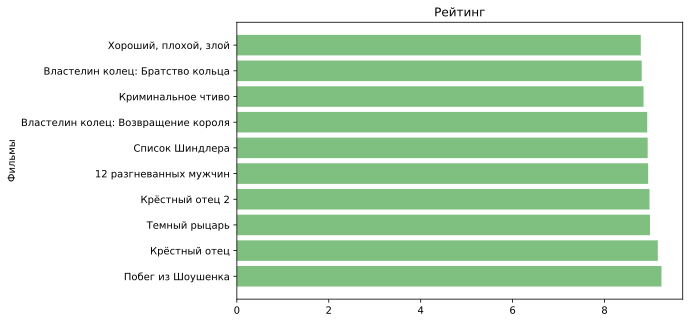

In [58]:
A = {}
for i in range(len(data.ratings)):
    A[data.title[i]] = str(round(float(data.ratings[i]), 2))
sorted_A = dict(sorted(A.items(), key=lambda item: item[1], reverse = True))
print(sorted_A)
B = []
C = []
f = 0
for k, v in A.items():
    if f == 10:
        break
    B.append(k)
    C.append(float(v))
    f+=1
print(B, C)
plt.barh(B, C, color='green', alpha=0.5)
plt.title('Рейтинг')
plt.ylabel('Фильмы')
plt.show()

{'Побег из Шоушенка': '9.2', 'Крёстный отец': '9.2', 'Темный рыцарь': '9.0', 'Крёстный отец 2': '9.0', '12 рaзгневанных мужчин': '9.0', 'Список Шиндлера': '8.9', 'Властелин колец: Возвращение короля': '8.9', 'Криминальное чтиво': '8.8', 'Властелин колец: Братство кольца': '8.8', 'Хороший, плохой, злой': '8.8', 'Форрест Гамп': '8.8', 'Бойцовский клуб': '8.7', 'Властелин колец: Две крепости': '8.7', 'Начало': '8.7', 'Звёздные войны. Эпизод 5: Империя наносит ответный удар': '8.7', 'Матрица': '8.7', 'Славные парни': '8.7', 'Пролетая над гнездом кукушки': '8.6', 'Семь': '8.6', 'Семь самураев': '8.6', 'Эта замечательная жизнь': '8.6', 'Молчание ягнят': '8.6', 'Город Бога': '8.6', 'Спасти рядового Райана': '8.6', 'Жизнь прекрасна': '8.6', 'Интерстеллар': '8.6', 'Зелёная миля': '8.6', 'Звёздные войны. Эпизод 4: Новая надежда': '8.6', 'Терминатор 2: Судный день': '8.5', 'Назад в будущее': '8.5', 'Унесённые призраками': '8.5', 'Психо': '8.5', 'Пианист': '8.5', 'Паразиты': '8.5', 'Леон': '8.5', 

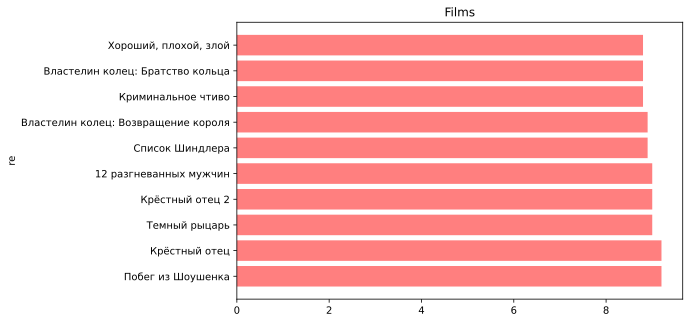

In [55]:
A = {}
for i in range(len(data.ratings)):
    A[data.title[i]] = str(round(float(data.ratings[i]), 1))
sorted_A = dict(sorted(A.items(), key=lambda item: item[1], reverse = True))
print(sorted_A)
B = []
C = []
f = 0
for k, v in A.items():
    if f == 10:
        break
    B.append(k)
    C.append(float(v))
    f+=1
print(B, C)
plt.barh(B, C, color='red', alpha=0.5)
plt.title('Films')
plt.ylabel('re')
plt.show()

{'Побег из Шоушенка': '9', 'Крёстный отец': '9', 'Темный рыцарь': '9', 'Крёстный отец 2': '9', '12 рaзгневанных мужчин': '9', 'Список Шиндлера': '9', 'Властелин колец: Возвращение короля': '9', 'Криминальное чтиво': '9', 'Властелин колец: Братство кольца': '9', 'Хороший, плохой, злой': '9', 'Форрест Гамп': '9', 'Бойцовский клуб': '9', 'Властелин колец: Две крепости': '9', 'Начало': '9', 'Звёздные войны. Эпизод 5: Империя наносит ответный удар': '9', 'Матрица': '9', 'Славные парни': '9', 'Пролетая над гнездом кукушки': '9', 'Семь': '9', 'Семь самураев': '9', 'Эта замечательная жизнь': '9', 'Молчание ягнят': '9', 'Город Бога': '9', 'Спасти рядового Райана': '9', 'Жизнь прекрасна': '9', 'Интерстеллар': '9', 'Зелёная миля': '9', 'Звёздные войны. Эпизод 4: Новая надежда': '9', 'Терминатор 2: Судный день': '9', 'Назад в будущее': '9', 'Унесённые призраками': '9', 'Психо': '9', 'Пианист': '9', 'Паразиты': '8', 'Леон': '8', 'Король лев': '8', 'Гладиатор': '8', 'Американская история Икс': '8', 

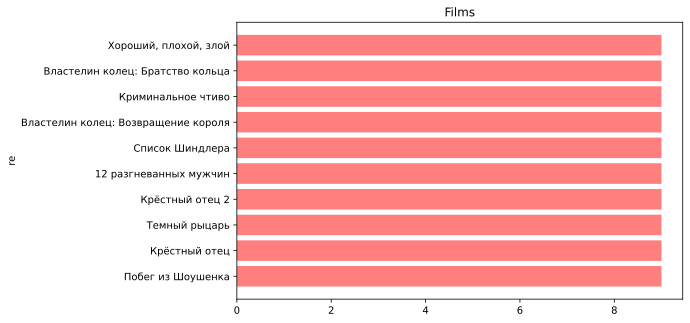

In [59]:
A = {}
for i in range(len(data.ratings)):
    A[data.title[i]] = str(round(float(data.ratings[i])))
sorted_A = dict(sorted(A.items(), key=lambda item: item[1], reverse = True))
print(sorted_A)
B = []
C = []
f = 0
for k, v in A.items():
    if f == 10:
        break
    B.append(k)
    C.append(int(v))
    f+=1
print(B, C)
plt.barh(B, C, color='red', alpha=0.5)
plt.title('Films')
plt.ylabel('re')
plt.show()

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}

film_urls = data['links'].tolist()
descriptions = []

for film_url in film_urls:
    html_text = requests.get(f'http://www.imdb.com{film_url}',headers=headers).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find(attrs={"name": "description"}).get("content")
    descriptions.append(description)
    
data['description'] = descriptions
data.head()

In [86]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
s1 = soup.findAll('td', class_='ratingColumn imdbRating')
s2 = soup.findAll('td', class_='titleColumn')
A = []
B = []
C = {}
for i in range(len(s1)):
    A.append(s2[i].findAll('a')[0].text)
    f = (s1[i].find_all('strong')[0].get('title')).replace(',', '').replace('based on', '').replace('user ratings', '')[3::].replace(' ', '')
    B.append(int(f))
for i in range(len(A)):
    C[B[i]] = str(A[i])
sort_C = sorted(C.items(), key=lambda item: item[0], reverse=True)
sorted_C = {k: v for k, v in sort_C}
k = 0
for i in sorted_C:
    if k == 10:
        break
    print(sorted_C[i] + ': ' + str(i))
    k+=1


Побег из Шоушенка: 2672008
Темный рыцарь: 2644840
Начало: 2344309
Бойцовский клуб: 2117435
Форрест Гамп: 2071957
Криминальное чтиво: 2047023
Матрица: 1908520
Властелин колец: Братство кольца: 1870727
Крёстный отец: 1851855
Властелин колец: Возвращение короля: 1841470


In [35]:
# isdigit()
A = set()
d = '0123456789'
for i in data.title:
    s = i.replace(':', '').replace('!', '').replace('?', '').replace('.', '').replace('»', '').replace('«', '').split(' ')
    for j in s:
        if j.isdigit() == False and j != '1+1' and j!= 'V' and j!='II':
            A.add(j)

A1 = {}

k = 0
for j in A:
    for i in data.title:
        if j in i:
            k+=1
    A1[j] = k
    k = 0
k = 0
for i in sorted(A1.items(), key=lambda para: para[1], reverse=True):
    if k == 10:
        break
    print(i)
    k+=1


('и', 144)
('с', 105)
('в', 83)
('я', 44)
('на', 41)
('В', 27)
('М', 21)
('во', 21)
('по', 19)
('не', 13)


In [10]:
A = set()
d = '0123456789'
for i in data.description:
    s = i.replace(':', '').replace('!', '').replace('?', '').replace('.', '').replace(',', '').replace('»', '').replace('«', '').split(' ')
    for j in s:
        if j.isdigit() == False:
            A.add(j)
A1 = {}

k = 0
for j in A:
    for i in data.description:
        if j in i:
            k+=1
    A1[j] = k
    k = 0
k = 0
for i in sorted(A1.items(), key=lambda para: para[1], reverse=True):
    if k == 10:
        break
    print(i)
    k+=1

('a', 250)
('With', 250)
('Directed', 250)
('it', 250)
('by', 250)
('an', 243)
('in', 239)
('he', 234)
('on', 221)
('to', 208)


In [9]:
A = set()
d = '0123456789'
for i in data.description:
    s = i.replace(':', '').replace('!', '').replace('?', '').replace('.', '').replace(',', '').replace('»', '').replace('«', '').split(' ')
    for j in s:
        if j.isdigit() == False:
            A.add(j)
B = set()
for i in data.title:
    s = i.replace(':', '').replace('!', '').replace('?', '').replace('.', '').replace(',', '').replace('»', '').replace('«', '').split(' ')
    for j in s:
        if j.isdigit() == False:
            B.add(j)
A1 = {}

k = 0
for j in A:
    if j in B:
        for i in data.description:
            if j in i :
                k+=1
        A1[j] = k
        k = 0
k = 0
for i in sorted(A1.items(), key=lambda para: para[1], reverse=True):
    if k == 10:
        break
    print(i)
    k+=1

('to', 208)
('or', 205)
('the', 204)
('A', 192)
('of', 155)
('и', 144)
('с', 105)
('di', 94)
('в', 83)
('V', 55)
